# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 3</font>

***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Configurações

In [2]:
library(dplyr)
library(ggplot2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
options(repr.plot.width = 7, repr.plot.height = 4)

### Importando dataset do projeto

In [1]:
dados = read.csv('data/dados.csv')

Warning message in file(file, "rt"):
“cannot open file 'data/dados.csv': No such file or directory”


ERROR: ignored

In [ ]:
head(dados)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631
6,11,1,34,8,12,790,1.637906


# <font color=green>2 TESTES DE HIPÓTESES</font>
***

Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

## <font color=green>2.1 Teste de normalidade</font>
***

A função *shapiro.test* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal, ou seja, os dados são normalmente distribuídos.

#### <font color=red>Documentações:

- [**shapiro.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/shapiro.test)

### Definindo a significância do teste ($\alpha$)

In [ ]:
significancia <- 0.05

### Testando a variável Renda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



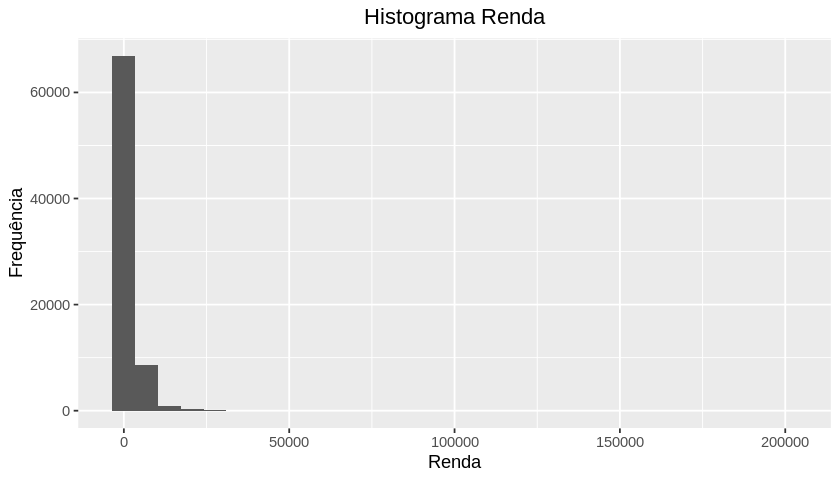

In [ ]:
ggplot(dados, aes(x = Renda)) + 
    geom_histogram() + 
    ylab("Frequência") + 
    xlab("Renda") + 
    ggtitle('Histograma Renda') +
    theme(plot.title=element_text(hjust = 0.5))

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq \alpha$

In [ ]:
set.seed(2811)
amostra = sample_n(dados, 5000)

In [ ]:
resultado <- shapiro.test(amostra$Renda)
resultado


	Shapiro-Wilk normality test

data:  amostra$Renda
W = 0.28423, p-value < 2.2e-16


In [ ]:
p_valor <- resultado$p.value
p_valor

[1] 0.04876354

In [ ]:
resultado$statistic

W 
0.999306

In [ ]:
p_valor <= significancia

[1] TRUE

In [ ]:
#EXERCICIO: TESTANTO NORMALIDADE
dados <- data.frame(
    Dados = c(116.48, -18.85, 150.38, 151.34, 105.08, 106.8, 0.12, 
        37.2, 152.73, 96.41, 111.03, 70.4, 98.05, 110.94, 33.61, 57.07, 
        123.72, 81.82, 105.77, 36.24, 79.45, 137.87, 85.7, 170.41, 
        68.46, 88.15, 60.26, 84.47, 168.2, 133.59, 84.49, 49.8, 104.52, 
        172.91, 121.5, 99.98, 208.15, 144.28, 105.39, 135.1)
)

head(dados)

resultado <- shapiro.test(dados$Dados)
resultado
significancia = 0.05
p_valor <- resultado$p.value
p_valor
p_valor <= significancia

,Dados
,<dbl>
1,116.48
2,-18.85
3,150.38
4,151.34
5,105.08
6,106.80



	Shapiro-Wilk normality test

data:  dados$Dados
W = 0.98783, p-value = 0.9383


[1] 0.9383145

[1] FALSE

### Testando a variável Altura

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



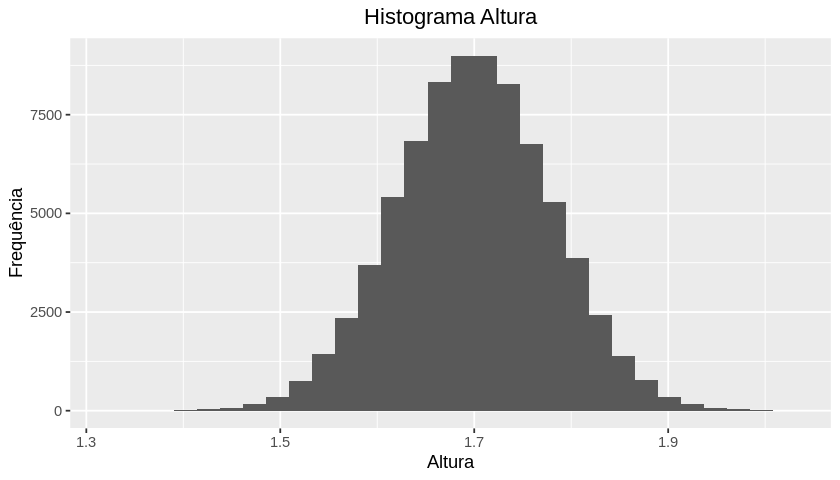

In [ ]:
ggplot(dados, aes(x = Altura)) + 
    geom_histogram() + 
    ylab("Frequência") + 
    xlab("Altura") + 
    ggtitle('Histograma Altura') +
    theme(plot.title=element_text(hjust = 0.5))

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq \alpha$

In [ ]:
resultado <- shapiro.test(amostra$Altura)
resultado


	Shapiro-Wilk normality test

data:  amostra$Altura
W = 0.99931, p-value = 0.04876


In [ ]:
p_valor <- resultado$p.value
p_valor
significancia

[1] 0.04876354

[1] 0.05

In [ ]:
resultado$statistic

W 
0.999306

In [ ]:
p_valor <= significancia

[1] TRUE

## <font color=green>2.2 Etapas Básicas de um Teste</font>
***

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$;

> ### <font color='red'>Pontos importantes</font>
> - De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


### **Passo 2** - escolha da distribuição amostral adequada;

> ### <font color='red'>Pontos importantes</font>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### <font color='red'>Pontos importantes</font>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> ![Níveis de Confiança e significância](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png)
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> ![Áreas de Aceitação e Rejeição](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### <font color='red'>Pontos importantes</font>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)


### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### <font color='red'>Pontos importantes</font>
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

---

# <font color=green>3 TESTES PARAMÉTRICOS</font>
***

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

## <font color=green>3.1 Teste Bicaudal</font>
***

## <font color='red'>Problema</font>

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

---

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras etc.).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

---

### Dados do problema

In [ ]:
amostra <- c(509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507)

In [ ]:
amostra = data.frame(Amostra = amostra)
head(amostra)

,Amostra
,<dbl>
1,509
2,505
3,495
4,510
5,496
6,509


In [ ]:
media_amostra <- 503.24
media_amostra

[1] 503.24

In [ ]:
desvio_padrao_amostra <- sd(amostra$Amostra)
desvio_padrao_amostra

[1] 4.483803

In [ ]:
media <- 500
significancia <- 0.05
confianca <- 0.95
n <- 50

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu = 500$

### $H_1: \mu \neq 500$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

#### <font color=red>Documentações:

- [**Normal**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/Normal)

In [ ]:
probabilidade <- qnorm(0.975)
probabilidade

[1] 1.959964

### Obtendo $z_{\alpha/2}$

In [ ]:
z_alpha_2 <- 1.96
z_alpha_2

[1] 1.96

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [ ]:
z <- (media_amostra - media) / (desvio_padrao_amostra/sqrt(n))
z

[1] 5.10956

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [ ]:
z <= -z_alpha_2

[1] FALSE

In [ ]:
z >= z_alpha_2

[1] TRUE

In [ ]:
if(z <= -z_alpha_2 || z >= z_alpha_2){
    'Rejeitar H0'
}else{
    'Aceitar H0'
}

[1] "Rejeitar H0"

In [ ]:
# Uma indústria de cimento afirma que a quantidade média de cimento nas 
# embalagens de seu produto é de 25 kg. Um teste de pesagem em uma amostra de 45 
# embalagens apresentou um peso médio igual a 25,2 kg. Medições anteriores 
# afirmam que a distribuição dos pesos segue uma normal e que o desvio padrão 
# populacional é igual a 400 g. Considerando um nível de significância igual a 
# 5%, responda as seguintes questões:

#1) Qual a hipótese nula a ser testada?
#2) Qual o valor da estatística de teste?
#3) Qual a conclusão do teste?

# Ho =  media_populacional = 25 kg

n = 45
media_amostra = 25.2
media_populacional = 25
desvio_populacional = 0.4 # 400g 
significancia = 0.05
z_alpha_2 = qnorm(0.975) # 1.96

z = (media_amostra - media_populacional)/(desvio_populacional / sqrt(n))
z


[1] 3.354102

### <font color='green'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
p_valor <- 2 * (1-pnorm(z))
p_valor

[1] 0.0007962302

In [ ]:
p_valor <= significancia

[1] TRUE

In [ ]:
#EXERCICIO
n = 75
media_populacao = 22
desvio_populacao = 10
media_amostra = 25
significancia = 0.01

Zobs = (media_amostra - media_populacao) / (desvio_populacao / sqrt(n))
p_valor <- 2 * (1-pnorm(Zobs))
p_valor
p_valor <= significancia
pnorm(Zobs)

[1] 0.009374768

[1] TRUE

[1] 0.9953126

In [ ]:
#EXERCICIO
n = 75
media_populacao = 22
desvio_populacao = 10
media_amostra = 20
significancia = 0.01

Zobs = (media_amostra - media_populacao) / (desvio_populacao / sqrt(n))

p_valor <- 2 * (pnorm(Zobs))
p_valor
# p_valor
# p_valor <= significancia

[1] 0.08326452

#### <font color=red>Documentações:

- [**Normal**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/Normal)
- [**ZTest**](https://www.rdocumentation.org/packages/DescTools/versions/0.99.19/topics/ZTest)

In [ ]:
install.packages('DescTools')

# OU

# packageurl <- "https://cran.r-project.org/src/contrib/Archive/DescTools/DescTools_0.99.30.tar.gz"
# install.packages(packageurl, repos=NULL, type="source")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
Ztest(amostra$Amostra, mu = media_populacional, sd_pop = desvio_padrao_amostra)

In [ ]:
n = 75
media_populacional = 22
desvio_populacional = 10
significancia = 0.01
z_critico = qnorm(0.995)

media_amostral = 25
z = (media_amostral - media_populacional) / (desvio_populacional / sqrt(n))
p_valor = (1 - pnorm(z)) + (1 - pnorm(z))
p_valor

media_amostral = 20
z = (media_amostral - media_populacional) / (desvio_populacional / sqrt(n))
p_valor = (0.5 - pnorm(z))
p_valor




[1] 0.009374768

[1] 0.4583677

---

## <font color=green>3.2 Teste Unicaudal</font>
***

## <font color='red'>Problema</font>

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra. 

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

### Construindo tabela $t$ de Student

#### <font color=red>Documentações:

- [**TDist**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/TDist)

In [ ]:
q <- seq(0.05, 0.005, by = -0.005)
df <- seq(1, 30, by = 1)
probabilidade <- c()
for(i in df){
    for(j in q){
        probabilidade <- c(probabilidade, qt(j, i, lower.tail = F))
    }
}
tabela_t_student <- matrix(probabilidade, ncol=10, byrow=TRUE)
colnames(tabela_t_student) <- format(q)
rownames(tabela_t_student) <- format(df)
tabela_t_student

,0.050,0.045,0.040,0.035,0.030,0.025,0.020,0.015,0.010,0.005
1,6.313752,7.026366,7.915815,9.057887,10.578895,12.706205,15.894545,21.204949,31.820516,63.656741
2,2.919986,3.103977,3.319764,3.578247,3.896425,4.302653,4.848732,5.642778,6.964557,9.924843
3,2.353363,2.470807,2.605427,2.762599,2.950510,3.182446,3.481909,3.896046,4.540703,5.840909
4,2.131847,2.226100,2.332873,2.455892,2.600762,2.776445,2.998528,3.297630,3.746947,4.604095
5,2.015048,2.097837,2.190958,2.297392,2.421585,2.570582,2.756509,3.002875,3.364930,4.032143
6,1.943180,2.019201,2.104306,2.201059,2.313263,2.446912,2.612242,2.828928,3.142668,3.707428
7,1.894579,1.966153,2.046011,2.136453,2.240879,2.364624,2.516752,2.714573,2.997952,3.499483
8,1.859548,1.927986,2.004152,2.090166,2.189155,2.306004,2.448985,2.633814,2.896459,3.355387
9,1.833113,1.899222,1.972653,2.055395,2.150375,2.262157,2.398441,2.573804,2.821438,3.249836
10,1.812461,1.876774,1.948099,2.028327,2.120234,2.228139,2.359315,2.527484,2.763769,3.169273


<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

As células da tabela acima são valores de $t$ para uma área ou probabilidade na cauda superior da distribuição $t$.

---

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

In [ ]:
amostra <- c(37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45)

In [ ]:
amostra = data.frame(Amostra = amostra)
head(amostra)

,Amostra
,<dbl>
1,37.27
2,36.42
3,34.84
4,34.60
5,37.49
6,36.53


In [ ]:
media_amostra <- mean(amostra$Amostra)
media_amostra

[1] 36.2504

In [ ]:
desvio_padrao_amostra <- sd(amostra$Amostra)
desvio_padrao_amostra

[1] 0.9667535

In [ ]:
media <- 37
significancia <- 0.05
confianca <- 1 - significancia
n <- 25
graus_de_liberdade <- 24 

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$


#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu \leq 37$

### $H_1: \mu > 37$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Não

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

#### <font color=red>Documentações:

- [**TDist**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/TDist)

In [ ]:
tabela_t_student[23:25, ]

,0.050,0.045,0.040,0.035,0.030,0.025,0.020,0.015,0.010,0.005
23,1.713872,1.769907,1.831567,1.900307,1.978249,2.068658,2.176958,2.313231,2.499867,2.807336
24,1.710882,1.766675,1.828051,1.896457,1.973994,2.063899,2.171545,2.306913,2.492159,2.796940
25,1.708141,1.763711,1.824828,1.892928,1.970095,2.059539,2.166587,2.301130,2.485107,2.787436


### Obtendo $t_{\alpha}$

In [ ]:
t_alpha <- 1.71
t_alpha

[1] 1.71

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [ ]:
t <- (media_amostra - media) / (desvio_padrao_amostra/ sqrt(n))
t

[1] -3.876893

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [ ]:
t >= t_alpha

[1] FALSE

In [ ]:
#EXERCICIO
n = 20
media_populacional = 150
media_amostra = 230
desvio_padrao_amostra = 90
significancia = 0.05
confianca = 1- significancia
graus_de_liberdade = n-1

Tcr = qt(confianca, graus_de_liberdade)
Tcr
Tobs = (media_amostra - media_populacional)/(desvio_padrao_amostra/sqrt(n))
Tobs
# Ho = media_populacional <= 150
# Ha = media_populacional >  150  

[1] 1.729133

[1] 3.975232

In [ ]:
#EXERCICIO
n = 35
media_populacional = 350
media_amostra = 330
desvio_padrao_amostra = 80
significancia = 0.05
confianca = 1- significancia

# Ho = media_populacional >= 350
# Ha = media_populacional <  350  

Zcr = qnorm(0.05)
Zcr
Zobs = (media_amostra - media_populacional)/(desvio_padrao_amostra/sqrt(n))
Zobs

[1] -1.644854

[1] -1.47902

### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
t

[1] -3.876893

In [ ]:
p_valor <- pt(t, graus_de_liberdade, lower.tail = FALSE)
p_valor

[1] 0.9994925

In [ ]:
p_valor <= significancia

#### <font color=red>Documentações:

- [**t.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/t.test)

In [ ]:
#EXERCICIO
n = 23
media_populacional = 75
media_amostra = 82
desvio_padrao_amostra = 12
significancia = 0.05
confianca = 1- significancia

Tobs = (media_amostra - media_populacional)/(desvio_padrao_amostra/sqrt(n))
Tobs


[1] 2.797568

In [ ]:
#EXERCICIO
n = 23
media_populacao = 75
desvio_amostra = 12
media_amostra = 82
significancia = 0.05
confianca = 0.95
graus_de_liberdade = n-1

Tobs = (media_amostra - media_populacao) / (desvio_amostra / sqrt(n))

p_valor <- pt(Tobs, graus_de_liberdade, lower.tail = TRUE)
p_valor
p_valor <= significancia
media_amostra = 70
Tobs = (media_amostra - media_populacao) / (desvio_amostra / sqrt(n))

p_valor <- pt(Tobs, graus_de_liberdade, lower.tail = TRUE)
p_valor
p_valor <= significancia

[1] 0.9947533

[1] FALSE

[1] 0.02909833

[1] TRUE

In [ ]:
library(glue)

#Uma lanchonete afirma que suas vendas médias são de exatamente R$ 32,00. 
#Uma amostra aleatória de 20 vendas foi selecionada e os valores são 
#apresentados no dataset abaixo. Sabe-se que as vendas são normalmente 
#distribuídas. Obtenha o valor da estatística de teste, o p-valor e a decisão 
#para o teste. Assuma um nível de significância de 5%.

vendas <- c(32.45, 26.8, 27.81, 30.22, 30.88, 24.9, 31.94, 16.02, 
    24.39, 26.01, 21.83, 25.35, 22.46, 38.2, 29.86, 22.79, 28.83, 
    27.34, 32.22, 33.26)
dataset <- data.frame(Amostra = vendas)

#Hipotese Nula -> media = 32

media_amostra = mean(dataset$Amostra)
desvio_amostra = sd(dataset$Amostra)
media = 32
n = 20
graus_de_liberdade = n-1
significancia = 0.05
confianca = 1 - significancia

Tc = qt(confianca, n-1) 
glue('T critico: {Tc}')

Tobs = (media_amostra - media)/(desvio_amostra / sqrt(n))
glue('T observado: {Tobs}')

p_valor <- 2 * pt(Tobs, graus_de_liberdade, lower.tail = TRUE)
glue('P valor: {p_valor}')

if (p_valor <= significancia){
  glue('Rejeitar Ho')
}else{
  glue('Aceitar Ho')
}

T critico: 1.72913281152137

T observado: -3.86530291041683

P valor: 0.00104220832393681

Rejeitar Ho

---

## <font color=green>3.4 Testes para Duas Amostras</font>
***

## <font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

---

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

### Seleção das amostras

In [ ]:
homens <- matrix(c(300, 1000, 4000, 5000, 300, 350, 1200, 1200, 1100, 1800, 700, 5000, 250, 1560, 400, 5500, 3000, 0, 1100, 1500, 500, 500, 788, 500, 3000, 788, 2400, 788, 3300, 1350, 2500, 2000, 1300, 2430, 9000, 10120, 1380, 2000, 1400, 1000, 500, 1500, 2200, 2100, 4000, 1000, 1200, 2900, 1800, 2000, 788, 1576, 800, 2400, 788, 788, 788, 0, 12000, 7880, 850, 1000, 1000, 1600, 3800, 788, 1200, 300, 350, 700, 6000, 1500, 5000, 2000, 1200, 800, 250, 800, 1600, 400, 3000, 2304, 800, 1400, 450, 788, 2200, 6000, 1200, 4000, 6000, 1100, 1200, 1300, 3000, 3000, 1500, 1280, 788, 1400, 788, 4000, 0, 1000, 2500, 1300, 3000, 500, 1600, 2000, 1280, 150, 0, 0, 7000, 1061, 700, 788, 2000, 788, 10500, 788, 1600, 1050, 1100, 3000, 800, 1400, 1200, 2500, 1000, 1500, 1500, 900, 2000, 300, 3000, 788, 1400, 2000, 2000, 3000, 2600, 15000, 1500, 950, 1200, 1500, 7500, 1400, 350, 750, 1200, 788, 0, 2500, 1700, 788, 700, 1600, 1200, 320, 6000, 2000, 2000, 3000, 900, 2100, 0, 788, 1800, 1600, 4000, 1300, 1300, 1500, 8900, 1400, 788, 600, 1000, 950, 2000, 4000, 2300, 2000, 800, 2500, 1500, 1400, 800, 6000, 788, 900, 200, 1300, 788, 2600, 1500, 8000, 900, 2000, 2000, 350, 3000, 9580, 0, 400, 800, 1700, 1800, 1200, 18000, 9000, 3000, 1200, 700, 1200, 400, 987, 6000, 2000, 0, 0, 480, 500, 800, 1680, 10000, 1200, 1700, 788, 2200, 10000, 10000, 100, 1200, 1600, 2500, 1300, 1200, 1300, 2200, 200, 60, 1100, 1200, 6000, 4500, 100, 788, 2900, 2500, 900, 788, 2500, 4000, 788, 1400, 1000, 300, 788, 1000, 4000, 2200, 788, 1000, 1000, 600, 1600, 6000, 2500, 2500, 1000, 3000, 2200, 4500, 1500, 4300, 1500, 8500, 3200, 1200, 1200, 1500, 4000, 2000, 1350, 1500, 890, 5000, 2400, 13000, 800, 1500, 1500, 2000, 580, 500, 920, 1200, 2000, 788, 500, 20000, 1350, 1576, 500, 8000, 1800, 600, 1000, 3000, 4000, 1500, 788, 600, 2300, 1500, 500, 500, 800, 900, 8000, 1600, 3000, 788, 1500, 5200, 900, 3565, 650, 1700, 1600, 788, 1200, 788, 788, 100, 900, 1700, 10000, 1600, 200, 788, 1400, 1500, 400, 4200, 1400, 4000, 5516, 3500, 700, 1400, 1200, 0, 7000, 2000, 5000, 2000, 750, 3000, 2000, 1500, 200, 3000, 1700, 1500, 7000, 1500, 788, 2400, 2500, 1500, 2000, 1500, 2000, 1100, 800, 1800, 480, 3500, 700, 3400, 5000, 5000, 1300, 3000, 2000, 900, 2000, 1000, 1800, 0, 1500, 788, 3500, 875, 5000, 2000, 1300, 1600, 0, 750, 1200, 120, 1800, 1200, 788, 1000, 0, 1400, 2300, 7000, 4000, 5000, 788, 20000, 4000, 0, 1200, 1800, 500, 1000, 788, 1300, 5000, 50, 1700, 2000, 1600, 2000, 1350, 1500, 600, 1700, 780, 2446, 2100, 5000, 1700, 1200, 1000, 788, 4500, 1500, 788, 0, 1580, 1000, 4500, 2400, 788, 1100, 2000, 788, 100, 1200, 1200, 1200, 1000, 2000, 788, 2000, 15000, 600, 0, 1500, 3000, 4000, 900, 810, 600, 1500, 4000, 1200, 5000, 5300, 2500, 800, 0, 1400, 1500, 4000, 1200, 400, 1000, 820, 1000, 1000, 788, 1500, 2500, 1500, 220, 600, 788, 1750, 7000))
mulheres <- matrix(c(788, 1200, 6000, 1000, 788, 1100, 1900, 1577, 900, 950, 1200, 788, 788, 1100, 30, 620, 900, 1000, 1200, 2000, 0, 500, 1200, 1500, 1200, 1120, 788, 788, 2300, 2400, 3000, 788, 4000, 1000, 500, 500, 1700, 200, 6000, 400, 950, 1100, 50, 930, 850, 1100, 3500, 1500, 1200, 900, 1100, 1500, 788, 1000, 788, 4500, 4000, 8000, 3500, 788, 1050, 1000, 1400, 3500, 600, 3000, 500, 930, 2660, 788, 360, 2364, 788, 160, 1100, 1085, 1050, 1500, 100, 0, 788, 250, 1700, 1300, 800, 0, 2000, 820, 910, 300, 2000, 200, 788, 788, 800, 1500, 1300, 1200, 0, 600, 1036, 400, 1100, 788, 400, 1500, 1200, 1800, 1000, 788, 850, 60, 1800, 3500, 600, 200, 500, 200, 1100, 1540, 1100, 900, 800, 500, 200, 1200, 1250, 788, 500, 200, 788, 200, 0, 1800, 2000, 1000, 900, 3000, 700, 1200, 788, 2800, 3300, 400, 0, 850, 1022, 6000, 750, 1000, 3500, 400, 1500, 1000, 800, 0, 980, 2400, 850, 1100, 788, 1100, 788, 1200, 788, 864, 1000, 500, 400, 3000, 1200, 100, 80, 900, 2000, 1250, 1000, 300, 400, 1500, 60, 8000, 1000, 600, 800, 350, 788, 0, 600, 788, 2500, 1300, 800, 8000, 1100, 800, 900, 2000, 0, 800, 1400, 1000, 1200, 788, 3840, 788, 3940, 788, 560, 800, 2000, 600, 2900, 0, 400, 800, 7000, 788, 788, 788, 788, 1250, 1500, 1386, 100, 300, 788, 788, 600, 600, 900, 2800, 788, 350, 900, 0, 150, 788, 788, 1000, 30, 788, 780, 900, 0, 0, 3000, 1800, 2000, 1100, 788, 0, 7500, 1800, 788, 788, 2000, 3000, 180, 2500, 800, 0, 1250, 200, 1100, 0, 1100, 400, 1300, 300, 0, 1312, 600, 200, 4000, 2400, 12000, 2150, 500, 400, 0, 600, 400, 788, 1200, 500, 2000, 1500, 70, 500, 2000, 1000, 100, 500, 2000, 100, 2115, 800, 5800, 2300, 750, 788, 0, 900, 1000, 600, 3000, 5500, 1600, 788, 4000, 0, 1100, 120, 320, 1100, 2500, 200, 800, 3000, 550, 4200, 7000, 720, 0, 2000, 5000, 2000, 788, 500, 788, 7000, 500, 788, 1760, 1200, 3500, 1500, 150, 800, 788, 3000, 400, 788, 1000, 2000, 2500, 0, 788, 5200, 788, 0, 600, 1300, 120, 850, 1576, 788, 2000, 1300, 788, 800, 1800, 655, 1580, 789, 788, 850, 788, 7000, 788, 430, 800, 788, 900, 10000, 1200, 300, 400, 788, 788, 3000, 900, 1300, 1300, 788, 800, 1000, 1890, 0, 788, 900, 4000, 788, 1010, 150, 450, 1700, 890, 1200, 2800, 1000, 788, 788, 700, 600, 800, 880, 6000, 800, 800, 820, 788, 1030, 560, 2100, 6500, 2500, 788, 400, 300, 788, 2300, 1000, 3500, 984, 1576, 420, 1700, 450, 1800, 400, 1500, 1500, 4256, 1200, 890, 1200, 300, 400, 850, 1500, 3800, 1800, 996, 2000, 1000, 788, 1500, 300, 600, 950, 1200, 788, 1200, 1500, 250, 788, 1200, 6000, 300, 789, 1500, 788, 3800, 780, 1200, 1200, 220, 788, 500, 200, 480, 1576, 1576, 1035, 900, 800, 1000, 805, 200, 1200, 2220, 1500, 880, 220, 2000, 788, 150, 0, 13000, 40, 5500, 788, 788, 1000, 400, 2000, 200, 1600))

### Dados do problema

In [ ]:
media_amostra_M <- mean(mulheres)
media_amostra_M

[1] 1357.528

In [ ]:
desvio_padrao_amostra_M <- sd(mulheres)
desvio_padrao_amostra_M

[1] 1569.901

In [ ]:
media_amostra_H <- mean(homens)
media_amostra_H

[1] 2142.608

In [ ]:
desvio_padrao_amostra_H <- sd(homens)
desvio_padrao_amostra_H

[1] 2548.051

In [ ]:
significancia <- 0.01
confianca <- 1 - significancia
n_M <- 500
n_H <- 500
D_0 <- 0

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino
### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### <font color='red'>Observação importante</font>
> Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [ ]:
probabilidade <- 0.99
probabilidade

[1] 0.99

In [ ]:
z_alpha <- qnorm(probabilidade)
z_alpha

[1] 2.326348

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img011.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [ ]:
numerador <- (media_amostra_H - media_amostra_M) - D_0

denominador <- sqrt((desvio_padrao_amostra_H**2 / n_H) + (desvio_padrao_amostra_M**2 / n_M))

z <- numerador / denominador

z

[1] 5.86562

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img012.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [ ]:
z >= z_alpha

[1] TRUE

### <font color='green'>Conclusão: Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
z

[1] 5.86562

In [ ]:
p_valor <- pnorm(z, lower.tail = FALSE)
p_valor

[1] 2.237287e-09

In [ ]:
p_valor <= significancia

[1] TRUE

#### <font color=red>Documentações:

- [**BSDA**](https://www.rdocumentation.org/packages/BSDA/versions/1.01)
- [**z.test**](https://www.rdocumentation.org/packages/BSDA/versions/1.01/topics/z.test)

In [ ]:
install.packages("BSDA")

# OU

# packageurl <- "https://cran.r-project.org/src/contrib/Archive/BSDA/BSDA_1.01.tar.gz"
# install.packages(packageurl, repos=NULL, type="source")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’




### z.test()

In [ ]:
library(BSDA)

Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange




In [ ]:
resultado <- z.test(x = homens,
                    y = mulheres,
                    alternative = 'greater', #UNICAUDAL SUPERIOR (à direita)
                    mu = D_0, 
                    sigma.x = sd(homens),
                    sigma.y = sd(mulheres),
                    conf.level = 0.99

) 
resultado


	Two-sample z-Test

data:  homens and mulheres
z = 5.8656, p-value = 2.237e-09
alternative hypothesis: true difference in means is greater than 0
99 percent confidence interval:
 473.7115       NA
sample estimates:
mean of x mean of y 
 2142.608  1357.528 


In [ ]:
p_valor <- resultado$p.value
p_valor

[1] 2.237287e-09

In [ ]:
p_valor <= significancia

[1] TRUE

### <font color=red>Somente como observação</font>
### t.test()

In [ ]:
resultado <- t.test(x = homens,
                    y = mulheres,
                    alternative = 'greater', #UNICAUDAL SUPERIOR (à direita)
                    paired = F,
                    var.equal = T)
resultado


	Two Sample t-test

data:  homens and mulheres
t = 5.8656, df = 998, p-value = 3.04e-09
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 564.7211      Inf
sample estimates:
mean of x mean of y 
 2142.608  1357.528 


In [ ]:
p_valor <- resultado$p.value
p_valor

[1] 3.040104e-09

In [ ]:
p_valor <= significancia

[1] TRUE

In [ ]:
# EXERCICIO: COMPARANDO NOTAS

# Uma prova de estatística foi aplicada em duas salas de aula diferentes. 
# Na sala A, tínhamos 50 alunos e a nota média foi de 5,3, com desvio padrão de 
# 2,1. Na sala B eram 55 alunos, que alcançaram nota média de 7,6 pontos, com 
# desvio padrão de 2,8. Considerando um nível de significância de 5% e que a 
# distribuição das notas segue uma normal, é possível afirmar que as notas 
# médias dessas duas salas foram diferentes?
# Indique a alternativa que apresenta a estatística de teste e a 
# conclusão do teste.

n_salaA = 50
media_salaA = 5.3
desvio_salaA = 2.1
n_salaB = 55
media_salaB = 7.6
desvio_salaB = 2.8
significancia = 0.05
Do = 0
Zc = qnorm(0.975)

# Ho => media_salaA = media_salaB => media_salaA - media_salaB = Do
# H1 => media_salaA <> media_salaB => media_salaA - media_salaB <> Do

numerador = (media_salaA - media_salaB) - Do
denominador = sqrt( ( desvio_salaA ** 2 / n_salaA ) + ( desvio_salaB ** 2 / n_salaB ))
Zobs = numerador / denominador

if (Zobs <= -Zc || Zobs >= Zc) {
    'Rejeitar H0'
} else {
    'Aceitar H0'
}

#USANDO P_VALUE

p_valor <- 2 * pnorm(Zobs, lower.tail = TRUE) # Zobs < 0

if (p_valor <= significancia) {
  'Rejeitar H0'
} else {
  'Aceitar H0'
}


[1] "Rejeitar H0"

[1] "Rejeitar H0"

In [ ]:
# EXERCICIO: VALOR DO M2
# Uma imobiliária da cidade do Rio de Janeiro alega que o valor do m² no 
# bairro do Leblon está avaliado em, no máximo, R$ 1000,00 a mais, quando 
# comparado ao bairro de Ipanema. Uma pesquisa realizada com uma amostra de 13 
# imóveis de cada bairro revelou os seguintes parâmetros:

# É possível concordar com a afirmação da imobiliária? Assuma um nível de 
# significância de 5% e populações normalmente distribuídas. Indique a 
# alternativa que apresenta a estatística de teste e a conclusão do teste.

Do = 1000
# Ho => media_leblon - media_ipanema <= Do
# H1 => media_leblon - media_ipanema > Do

n_leblon = 13
media_leblon = 21800
desvio_leblon = 450

n_ipanema = 13
media_ipanema = 20300
desvio_lebipanema = 320
significancia = 0.05
confianca = 1 - significancia

if ((n_leblon + n_ipanema) < 30) {
    grau_liberdade = n_leblon + n_ipanema - 2 # vamos utilizar T de STUDENT
    #grau_liberdade = 24
}

Tc = 1.71 #Consultando tabela linha = grau de liberdade, coluna = significancia
#ou
Tc = qt(confianca, grau_liberdade)
Tc

numerador = (media_leblon - media_ipanema) - Do
denominador = sqrt( ( desvio_leblon ** 2 / n_leblon ) + ( desvio_lebipanema ** 2 / n_ipanema ))
Tobs = numerador / denominador
Tobs

if (Tobs >= Tc) {
    'Rejeitar H0'
} else {
    'Aceitar H0'
}

#USANDO P_VALUE

p_valor <- pt(Tobs, grau_liberdade, lower.tail = FALSE)

if (p_valor <= significancia) {
  'Rejeitar H0'
} else {
  'Aceitar H0'
}

[1] 1.710882

[1] 3.264848

[1] "Rejeitar H0"

[1] "Rejeitar H0"

---

# <font color=green>4 TESTES NÃO PARAMÉTRICOS</font>
***

O trabalho com pequenas amostras pode levar a não aceitação da validade do teorema central do limite e também na impossibilidade de fazer suposições sobre a distribuição da variável avaliada. Quando isso ocorre torna-se necessária a aplicação de testes não paramétricos. Nos testes não paramétricos, não fazemos hipóteses sobre a distribuição (de probabilidade) das quais as observações são extraídas.

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

## <font color=green>4.1 Teste do Qui-Quadrado ( $\chi^2$)</font>
***

Também conhecido como teste de adequação ao ajustamento, seu nome se deve ao fato de utilizar uma variável estatística padronizada, representada pela letra grega qui ( $\chi$) elevada ao quadrado. A tabela com os valores padronizados e como obtê-la podem ser vistos logo abaixo.

O teste do $\chi^2$ testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento.

Os passos de aplicação do teste são bem parecidos aos vistos para os testes paramétricos.

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img017.png)

### Construindo tabela $\chi^2$

#### <font color=red>Documentações:

- [**Chisquare**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/Chisquare)

In [ ]:
p <- c(0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.95, 0.99, 0.995)
df <- seq(1, 30, by = 1)
probabilidade <- c()
for(i in df){
    for(j in p){
        probabilidade <- c(probabilidade, round(qchisq(j, i, lower.tail = T), 4))
    }
}
tabela_chi_2 <- matrix(probabilidade, ncol=13, byrow=TRUE)
colnames(tabela_chi_2) <- format(p)
rownames(tabela_chi_2) <- format(df)
tabela_chi_2

,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382
4,0.2070,0.2971,0.4844,0.7107,1.0636,1.9226,3.3567,5.3853,7.7794,11.1433,9.4877,13.2767,14.8603
5,0.4117,0.5543,0.8312,1.1455,1.6103,2.6746,4.3515,6.6257,9.2364,12.8325,11.0705,15.0863,16.7496
6,0.6757,0.8721,1.2373,1.6354,2.2041,3.4546,5.3481,7.8408,10.6446,14.4494,12.5916,16.8119,18.5476
7,0.9893,1.2390,1.6899,2.1673,2.8331,4.2549,6.3458,9.0371,12.0170,16.0128,14.0671,18.4753,20.2777
8,1.3444,1.6465,2.1797,2.7326,3.4895,5.0706,7.3441,10.2189,13.3616,17.5345,15.5073,20.0902,21.9550
9,1.7349,2.0879,2.7004,3.3251,4.1682,5.8988,8.3428,11.3888,14.6837,19.0228,16.9190,21.6660,23.5894
10,2.1559,2.5582,3.2470,3.9403,4.8652,6.7372,9.3418,12.5489,15.9872,20.4832,18.3070,23.2093,25.1882


<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img016.png' width='250px'>

Tabela com os valores de $\chi_p^2$ em função dos graus de liberdade $(n - 1)$ e de $p = P(\chi^2 \leq \chi_p^2)$

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

---

### Dados do problema

In [ ]:
F_Observada <- c(17, 33)
F_Esperada <- c(25, 25)
significancia <- 0.05
confianca <- 1 - significancia
k <- 2 # Número de eventos possíveis
graus_de_liberdade <- k-1

chi_2_alpha <- qchisq(confianca, graus_de_liberdade)
glue('X2 alpha: {chi_2_alpha}')

chi_2 = 0

for(i in 1:k){
  chi_2 = chi_2 + ((F_Observada[i] - F_Esperada[i]) ** 2 / F_Esperada[i])
}
glue('X2: {chi_2}')

if (chi_2 > chi_2_alpha) {
  glue('Rejeitar Ho')
}else{
  glue('Aceitar Ho')
}

# Utilizando p_valor
p_valor <- pchisq(chi_2, df = graus_de_liberdade, lower.tail = FALSE)
glue('P_valor: {p_valor}')

if (p_valor <= significancia){
  glue('Rejeitar Ho')
}else{
  glue('Aceitar Ho')
}

# Utilizando funcao do R
resultado <- chisq.test(x = F_Observada, p = c(0.5, 0.5))  
resultado
resultado$observed
resultado$expected

X2 alpha: 3.84145882069412

X2: 5.12

Rejeitar Ho

P_valor: 0.023651616655356

Rejeitar Ho


	Chi-squared test for given probabilities

data:  F_Observada
X-squared = 5.12, df = 1, p-value = 0.02365


[1] 17 33

[1] 25 25

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: F_{CARA} = F_{COROA}$

### $H_1: F_{CARA} \neq F_{COROA}$

---

### **Passo 2** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [ ]:
tabela_chi_2[1:3, ]

,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382


### Obtendo $\chi_{\alpha}^2$

In [ ]:
chi_2_alpha <- qchisq(confianca, graus_de_liberdade)
chi_2_alpha

[1] 3.841459

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img018.png)

---

### **Passo 3** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

Onde

$F_{i}^{Obs}$ = frequência observada para o evento $i$

$F_{i}^{Esp}$ = frequência esperada para o evento $i$

$k$ = total de eventos possíveis

In [ ]:
chi_2 <- ( (F_Observada[1] - F_Esperada[1]) ** 2 / F_Esperada[1]) + ( (F_Observada[2] - F_Esperada[2]) ** 2 / F_Esperada[2])
chi_2

[1] 5.12

In [ ]:
chi_2 = 0

for(i in 1:k){
  chi_2 = chi_2 + ((F_Observada[i] - F_Esperada[i]) ** 2 / F_Esperada[i])
}
chi_2

[1] 5.12

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img019.png)

---

### **Passo 4** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img020.png' width=80%>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $\chi_{teste}^2 > \chi_{\alpha}^2$

In [ ]:
chi_2 > chi_2_alpha

### <font color='green'>Conclusão: Com um nível de confiança de 95% rejeitamos a hipótese nula ($H_0$) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a moeda não é honesta e precisa ser substituída.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
chi_2

[1] 5.12

In [ ]:
p_valor <- pchisq(chi_2, df = graus_de_liberdade, lower.tail = FALSE)
p_valor

[1] 0.02365162

#### <font color=red>Documentações:

- [**chisq.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/chisq.test)

In [ ]:
chisq.test(
  x = F_Observada
)


	Chi-squared test for given probabilities

data:  F_Observada
X-squared = 5.12, df = 1, p-value = 0.02365


In [ ]:
resultado <- chisq.test(x = F_Observada, p = c(0.5, 0.5))  
resultado


	Chi-squared test for given probabilities

data:  F_Observada
X-squared = 5.12, df = 1, p-value = 0.02365


In [ ]:
resultado$statistic

X-squared 
     5.12

In [ ]:
resultado$parameter

df 
 1

In [ ]:
p_valor <- resultado$p.value
p_valor

[1] 0.02365162

In [ ]:
resultado$observed

[1] 17 33

In [ ]:
resultado$expected

[1] 25 25

In [ ]:
p_valor <= significancia

[1] TRUE


Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse




In [ ]:
# O resultado de 60 lançamentos de duas moedas apresentou a seguinte frequência 
# de resultados:

# Ho = F1 = F2
# H1 = F1 <> F2

significancia = 0.05
confianca = 1 - 0.05
graus_de_liberdade = 2

F_Observada = c(12, 34, 14)
F_Esperada = c(15, 30, 15)

#Estatistica de teste
chi_2 = 0
for(i in 1:k){
  chi_2 = chi_2 + ((F_Observada[i] - F_Esperada[i]) ** 2 / F_Esperada[i])
}
glue('X2: {chi_2}')

k = 2 # Número de eventos possíveis
graus_de_liberdade = k-1
chi_2_alpha = qchisq(confianca, graus_de_liberdade)
glue('X2 alpha: {chi_2_alpha}')

if (chi_2 > chi_2_alpha) {
  glue('Rejeitar Ho')
}else{
  glue('Aceitar Ho')
}

# Utilizando P_VALOR
p_valor <- pchisq(chi_2, graus_de_liberdade, lower.tail = FALSE)
glue('P_valor: {p_valor}')

if (p_valor <= significancia){
  glue('Rejeitar Ho')
}else{
  glue('Aceitar Ho')
}

# Utilizando funcao do R 
resultado = chisq.test(x = c(12, 34, 14), p = c(0.25, 0.5, 0.25))
resultado
resultado$observed
resultado$expected

X2: 1.13333333333333

X2 alpha: 3.84145882069412

Aceitar Ho

P_valor: 0.287065448144961

Aceitar Ho


	Chi-squared test for given probabilities

data:  c(12, 34, 14)
X-squared = 1.2, df = 2, p-value = 0.5488


[1] 12 34 14

[1] 15 30 15

In [ ]:
# EXERCICIO P_VALOR
p_valor <- pchisq(7.45, df = 5, lower.tail = FALSE)
p_valor <= significancia

[1] FALSE

---

## <font color='red'>Problema</font>

Um novo tratamento para acabar com o hábito de fumar está sendo empregado em um grupo de **35 pacientes** voluntários. De cada paciente testado foram obtidas as informações de quantidades de cigarros consumidos por dia antes e depois do término do tratamento. Assumindo um **nível de confiança de 95%** é possível concluir que, depois da aplicação do novo tratamento, houve uma mudança no hábito de fumar do grupo de pacientes testado?

## <font color=green>4.2 Teste Wilcoxon</font>
### Comparação de duas populações - amostras dependentes
***

Empregado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas. Pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas.

#### <font color=red>Documentações:

- [**aggregate**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/aggregate)
- [**merge**](https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/merge)
- [**apply**](https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/apply)
- [**Extremes**](https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/Extremes)
- [**sum**](https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/sum)

### Dados do problema

In [ ]:
fumo <- data.frame(
    Antes = c(39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49),
    Depois = c(16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6)
)
significancia <- 0.05
confianca <- 1 - significancia
n <- 35

In [ ]:
head(fumo)

,Antes,Depois
,<dbl>,<dbl>
1,39,16
2,25,8
3,24,12
4,50,0
5,13,14
6,52,16


In [ ]:
media_antes <- mean(fumo$Antes)
media_antes

[1] 31.85714

In [ ]:
media_depois <- mean(fumo$Depois)
media_depois

[1] 11.2

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu_{antes} = \mu_{depois}$

### $H_1: \mu_{antes} > \mu_{depois}$

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Obtendo $z_{\alpha/2}$

In [ ]:
probabilidade <- (0.5 + (confianca / 2))
probabilidade

[1] 0.975

In [ ]:
z_alpha_2 <- qnorm(probabilidade)
z_alpha_2

[1] 1.959964

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

Onde

## $T$ = menor das somas de postos de mesmo sinal

# $$\mu_T = \frac{n(n+1)}{4}$$
# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

### Construindo a tabela com os postos

In [ ]:
fumo

In [ ]:
fumo['Dif'] <- fumo$Depois - fumo$Antes
fumo

In [ ]:
fumo['|Dif|'] = abs(fumo$Dif)
fumo

In [ ]:
fumo <- fumo[order(fumo$'|Dif|'),]
fumo

In [ ]:
fumo['Posto'] <- seq(1, nrow(fumo))
fumo

In [ ]:
posto <- aggregate(x = fumo$'Posto', by = list(fumo$'|Dif|'), FUN = mean)
colnames(posto) <- c('|Dif|', 'Posto')
posto

In [ ]:
fumo$Posto <- NULL
fumo

In [ ]:
fumo <- merge(x = fumo, y = posto, by = '|Dif|', all.x = TRUE)
fumo

In [ ]:
fumo['Posto (+)'] <- apply(fumo[, c('Dif', 'Posto')], 1, function(x) if(x[1] > 0) x[2] else 0)
fumo

In [ ]:
fumo['Posto (-)'] <- apply(fumo[, c('Dif', 'Posto')], 1, function(x) if(x[1] < 0) x[2] else 0)
fumo

In [ ]:
fumo$Posto <- NULL
fumo

### Obter $T$

## $T$ = menor das somas de postos de mesmo sinal

In [ ]:
T <- min( sum( fumo['Posto (+)'] ), sum( fumo['Posto (-)'] ) )
T

[1] 22

In [ ]:
sum( fumo['Posto (+)'] )
sum( fumo['Posto (-)'] )

[1] 22

[1] 608

### Obter $\mu_T$

# $$\mu_T = \frac{n(n+1)}{4}$$


In [ ]:
mu_T <- ( n * ( n + 1 ) ) / 4
mu_T

[1] 315

### Obter $\sigma_T$

# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

In [ ]:
sigma_T <- sqrt( ( n * ( n + 1 ) * ( ( 2 * n ) + 1 ) ) / 24 )
sigma_T

[1] 61.05326

### Obter $Z_{teste}$

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

In [ ]:
Z <- ( T - mu_T ) / sigma_T
Z

[1] -4.799089

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img021.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img022.png' width='80%'>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $Z \leq -z_{\alpha / 2}$ ou se $Z \geq z_{\alpha / 2}$

In [ ]:
Z <= -z_alpha_2

[1] TRUE

In [ ]:
Z >= z_alpha_2

[1] FALSE

In [ ]:
if ((Z <= -z_alpha_2) || (Z >= z_alpha_2)) {
  'Rejeitar Ho'
}else{
  'Aceitar Ho'
}

[1] "Rejeitar Ho"

### <font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento. E como é possível verificar através das médias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

#### <font color=red>Documentações:

- [**wilcox.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/wilcox.test)

In [ ]:
resultado <- wilcox.test(fumo$Depois, fumo$Antes, paired = TRUE, correct = FALSE)
resultado

Warning message in wilcox.test.default(fumo$Depois, fumo$Antes, paired = TRUE, correct = FALSE):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test

data:  fumo$Depois and fumo$Antes
V = 22, p-value = 1.584e-06
alternative hypothesis: true location shift is not equal to 0


In [ ]:
p_valor <- resultado$p.value
p_valor

[1] 1.58431e-06

In [ ]:
p_valor <= significancia

[1] TRUE

In [ ]:
if (p_valor <= significancia) {
  'Rejeitar Ho'
}else{
  'Aceitar Ho'
}

[1] "Rejeitar Ho"

In [ ]:
n = 30
significancia = 0.1
confianca = 1 - significancia

alunos <- data.frame(
    Sem_Alura = c(4, 3, 5, 4, 8, 6, 5, 7, 6, 7, 8, 7, 3, 7, 4, 7, 5, 7, 5, 7, 6, 4, 3, 3, 6, 3, 7, 4, 6, 6),
    Com_Alura = c(8, 6, 10, 3, 9, 5, 8, 5, 4, 10, 5, 9, 8, 5, 10, 8, 7, 9, 9, 5, 5, 7, 8, 9, 8, 5, 5, 8, 5, 9)
)

media_sem_alura = mean(alunos$Sem_Alura)
media_sem_alura
media_com_alura = mean(alunos$Com_Alura)
media_com_alura

qnorm(0.95)

[1] 5.433333

[1] 7.066667

[1] 1.644854

In [ ]:
z_alpha_2 = qnorm(0.95)

In [ ]:
mu_T = (n*(n+1))/4
mu_T
sigma_T = sqrt((n*(n+1) * (2*n+1))/24) 
sigma_T

[1] 232.5

[1] 48.61841

In [ ]:
alunos['dif'] = alunos$Com_Alura - alunos$Sem_Alura
alunos['|dif|'] = abs(alunos$dif)
alunos = alunos[order(alunos['|dif|']), ]
alunos['posto'] = seq(1, nrow(alunos))
alunos

In [ ]:
posto = aggregate(x = alunos$'posto', by = list(alunos$'|dif|'), FUN = mean)
colnames(posto) = c('|dif|', 'posto')
posto

In [ ]:
alunos$posto <- NULL
alunos <- merge(x = alunos, y = posto, by = '|dif|', all.x = TRUE)
alunos

In [ ]:
alunos['Posto (+)'] <- apply(alunos[, c('dif', 'posto')], 1, function(x) if(x[1] > 0) x[2] else 0)
alunos['Posto (-)'] <- apply(alunos[, c('dif', 'posto')], 1, function(x) if(x[1] < 0) x[2] else 0)

In [ ]:
alunos

In [ ]:
T = min( sum( alunos['Posto (+)'] ), sum( alunos['Posto (-)'] ) ) 
T

Z <- ( T - mu_T ) / sigma_T 
Z

[1] 91

[1] -2.91042

In [ ]:
if ((Z <= -z_alpha_2) || (Z >= z_alpha_2)) {
  'Rejeitar Ho'
}else{
  'Aceitar Ho'
}


[1] "Rejeitar Ho"

In [ ]:
pesos <- data.frame(
    Sem_Composto = c(180, -39, 325, 303, 127, 149, 271, 163, 287, 255, 398, 324, 335, 421, 
        216, 274, 373, 116, 197, -37, 321, 431, 112, 304, 417, 362, 51, 187, 195, 304, 202, 158, 105, 90, 245),
    Com_Composto = c(484, 187, 442, 108, 488, 283, 286, 419, 240, 266, 198, 130, 484, 424, 
        145, 133, 282, 386, 408, 290, 429, 386, 318, 390, 347, 442, 440, 356, 517, 454, 401, 108, 228, 471, 495)
)

resultado <- wilcox.test(pesos$Com_Composto, pesos$Sem_Composto, paired = TRUE, correct = FALSE)
resultado

significancia = 0.05

if (p_valor <= significancia) {
  'Rejeitar Ho'
}else{
  'Aceitar Ho'
}



	Wilcoxon signed rank exact test

data:  pesos$Com_Composto and pesos$Sem_Composto
V = 509, p-value = 0.001027
alternative hypothesis: true location shift is not equal to 0


[1] "Rejeitar Ho"

In [ ]:
media_pop = 2500
desvio_pop = 500
n = 300
media_amostra = 2400

significancia = 0.03

Z = (2400-2500)/(500/sqrt(n))
Z

p_valor <- pnorm(Z, lower.tail = TRUE)
p_valor

if (p_valor <= significancia) {
  'Rejeitar Ho'
}else{
  'Aceitar Ho'
}


[1] -3.464102

[1] 0.0002660028

[1] "Rejeitar Ho"